In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import evaluate, print_perf
from surprise import KNNBasic

# Load & Sample data

In [2]:
dt = pd.read_csv('/home/tungngo/Downloads/ratings_Grocery_and_Gourmet_Food.csv')

In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297155 entries, 0 to 1297154
Data columns (total 4 columns):
A1ZQZ8RJS1XVTX    1297155 non-null object
0657745316        1297155 non-null object
5.0               1297155 non-null float64
1381449600        1297155 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 39.6+ MB


In [4]:
dt.columns = ['reviewerID','productID','rating','unixTime']

In [5]:
dt.head()

,reviewerID,productID,rating,unixTime
0,A31W38VGZAUUM4,0700026444,5.0,1354752000
1,A3I0AV0UJX5OH0,1403796890,1.0,1385942400
2,A3QAAOLIXKV383,1403796890,3.0,1307836800
3,AB1A5EGHHVA9M,141278509X,5.0,1332547200
4,A3DTB6RVENLQ9Q,1453060375,1.0,1362268800


In [6]:
dt['unixTime'] = pd.to_datetime(dt['unixTime'],unit='s')
dt = dt.rename(columns={'unixTime':'date'})

In [7]:
#Only take recent reviews
dt = dt.loc[dt['date']>'2014-01-01']
#Last Date
dt['date'].max()

Timestamp('2014-07-23 00:00:00')

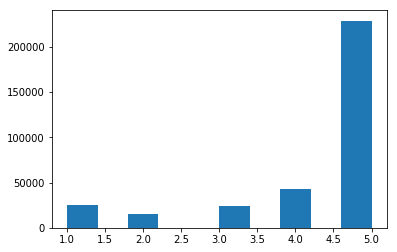

In [8]:
#Histogram of ratings
rating_hist = plt.hist(dt['rating'],align='mid')
#Group by product ID to count reviews per product
item_groupby = dt.groupby('productID',as_index=False)
review_count = item_groupby['reviewerID'].count()
review_count.columns = ['productID','count_review']

In [9]:
review_count.head()

,productID,count_review
0,1603112251,1
1,1613170416,3
2,1837994021,1
3,3295000018,13
4,3301261876,6


In [10]:
#Randomly select products from subset of products with at least a number of reviews
product_list = review_count[review_count['count_review']>=10]
random_product = product_list.take(np.random.permutation(len(product_list))[:100])
random_product_list = random_product['productID']

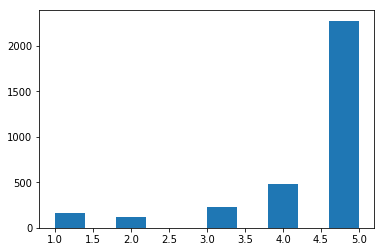

In [11]:
#Merge these products with original rating data
data = dt.loc[dt['productID'].isin(random_product_list)]
rating_hist = plt.hist(data['rating'],align='mid')
#Write to a CSV file
data.to_csv('/home/tungngo/code/personalization/sample_data')

In [12]:
data.describe()

,rating
count,3270.000000
mean,4.401835
std,1.098957
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


# Matrix Factorization

In [13]:
#Baseline model

In [14]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(data[['reviewerID','productID','rating']],reader)

In [15]:
algo = SVD()

In [16]:
perf = evaluate(algo, data, measures=['RMSE', 'MAE'],verbose=2)

Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
user: A2VH0UT5EQFB6P item: B00GFE611W r_ui = 4.00   est = 4.45   {'was_impossible': False}
user: A2PGJWPKC3UFD0 item: B001D05RWC r_ui = 4.00   est = 4.56   {'was_impossible': False}
user: A3JTFTS1SVNHBG item: B008YDVXM4 r_ui = 5.00   est = 4.46   {'was_impossible': False}
user: A2NTHBZOLO6WEY item: B00C7HM3GI r_ui = 5.00   est = 4.45   {'was_impossible': False}
user: A1OYV5EQ7W6FB0 item: B000EUF9E8 r_ui = 5.00   est = 4.49   {'was_impossible': False}
user: A352SGOQZ0H3JD item: B0008D6WBA r_ui = 3.00   est = 4.62   {'was_impossible': False}
user: A1FMP4YLX37WP item: B001D05RWC r_ui = 5.00   est = 4.56   {'was_impossible': False}
user: A25MXFOR9GPK68 item: B00GO5WO5O r_ui = 5.00   est = 4.62   {'was_impossible': False}
user: A3PTVE6CT1G4KB item: B00872Q0E8 r_ui = 3.00   est = 4.38   {'was_impossible': False}
user: A27SJIOU39S074 item: B001D05RWC r_ui = 5.00   est = 4.56   {'was_impossible': False}
user: AGUHAM5859TEC item: B000L

user: A24Q9FCM0VKYIK item: B000WY96Q8 r_ui = 2.00   est = 4.16   {'was_impossible': False}
user: A3LUZBT8U8ONLH item: B000ARPKE4 r_ui = 5.00   est = 4.45   {'was_impossible': False}
user: AIQS65AISQ9TG item: B002YLG6I8 r_ui = 5.00   est = 3.93   {'was_impossible': False}
user: A1GH0TQCHT8C1Y item: B005G2FC82 r_ui = 4.00   est = 4.12   {'was_impossible': False}
user: A2BRE63F5UJXOM item: B00DE4I5CE r_ui = 5.00   est = 4.62   {'was_impossible': False}
user: A21YSN7XJL1N5I item: B001D05RWC r_ui = 5.00   est = 4.56   {'was_impossible': False}
user: A91UDP4P7EC42 item: B00AMZ9GQ2 r_ui = 4.00   est = 4.42   {'was_impossible': False}
user: A11SMJ39FR0TBM item: B007KPFSJ6 r_ui = 5.00   est = 4.80   {'was_impossible': False}
user: A1T9I3CR0W6MLN item: B000E672AG r_ui = 5.00   est = 4.14   {'was_impossible': False}
user: A1T7LXC5NUGGRS item: B00EO59U7G r_ui = 5.00   est = 4.43   {'was_impossible': False}
user: A2F6NO5GSV2A5F item: B00142E52C r_ui = 5.00   est = 4.44   {'was_impossible': False}
u

user: A35LD9QOJ5KDMC item: B000R4LONQ r_ui = 5.00   est = 4.64   {'was_impossible': False}
user: A3L7CU8W50DIM9 item: B005AYE8UE r_ui = 5.00   est = 3.89   {'was_impossible': False}
user: A22A6I87DV7H7M item: B001D05RWC r_ui = 5.00   est = 4.54   {'was_impossible': False}
user: AEZW3XBE14L40 item: B0008D6WBA r_ui = 4.00   est = 4.62   {'was_impossible': False}
user: A2PVL5RKAROYVN item: B0008D6WBA r_ui = 4.00   est = 4.62   {'was_impossible': False}
user: A3HJD6RGC280H3 item: B003JJX83K r_ui = 5.00   est = 3.63   {'was_impossible': False}
user: A1J5SJC832IB2K item: B00934O46K r_ui = 5.00   est = 4.44   {'was_impossible': False}
user: AAM1HDP7YA6XC item: B00471YHU2 r_ui = 5.00   est = 4.21   {'was_impossible': False}
user: A26KPG4EY0JLXM item: B000BLNU6E r_ui = 2.00   est = 3.85   {'was_impossible': False}
user: A1U90MYVSLLFI1 item: B00FI32PAC r_ui = 5.00   est = 4.75   {'was_impossible': False}
user: A3TX9J5EGOUTLC item: B001D05RWC r_ui = 5.00   est = 4.54   {'was_impossible': False}
u

user: A1EFLS0XT0V7O8 item: B001D05RWC r_ui = 5.00   est = 4.61   {'was_impossible': False}
user: A3EDTTSG4S5GMM item: B00EO59U7G r_ui = 5.00   est = 4.47   {'was_impossible': False}
user: A14LV0X62S7G3Y item: B00EO59U7G r_ui = 4.00   est = 4.47   {'was_impossible': False}
user: A1PCXJHN7HAW58 item: B004JUKFPC r_ui = 5.00   est = 4.48   {'was_impossible': False}
user: A3SNSAVZJEU1OP item: B008YDVXM4 r_ui = 4.00   est = 4.51   {'was_impossible': False}
user: A2AW7QODUER3IF item: B00BDQ9NEE r_ui = 1.00   est = 4.18   {'was_impossible': False}
user: A3SMD3T0QTN109 item: B00GFE611W r_ui = 5.00   est = 4.41   {'was_impossible': False}
user: A39EAIOCOUBE3A item: B0001A0ZHM r_ui = 5.00   est = 4.30   {'was_impossible': False}
user: A25ZHRQ9RJAQ97 item: B00AMZ9GQ2 r_ui = 5.00   est = 4.41   {'was_impossible': False}
user: A3S902TXMCMH4M item: B001D05RWC r_ui = 2.00   est = 4.61   {'was_impossible': False}
user: A2ONS23EJA09YU item: B00EO59U7G r_ui = 2.00   est = 4.47   {'was_impossible': False}

In [17]:
print_perf(perf)

        Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    
RMSE    1.1177  1.0283  1.0953  1.0943  1.0906  1.0852  
MAE     0.8189  0.7639  0.8048  0.8016  0.8159  0.8010  
